In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Display of the dataset
path = pd.read_csv("Data/21-Appliances.csv")
df = pd.DataFrame(path)
df.head()

,brandId,subcategoryId,imageUrl,asin,title,brandName,categoryId,subcategory.subcategoryName,rank,amazonIsr,...,productPageScore,manufacturer,upc,partNumber,model,numberOfItems,totalRatings,momGrowth,momGrowth12,note
0,181347,2.399939e+09,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",B09ZRNP19N,GE Profile Opal 1.0 Nugget Ice Maker| Countert...,GE PROFILE,21,Ice Makers,NaN,0.0,...,9.2,GE Profile,8.469190e+10,P4INAASSTSS,P4INAASSTSS,1,0.0,-0.770,NaN,NaN
1,297220,3.741161e+06,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",B0C7M5MKDQ,Maxblue RPWFE (with CHIP) NSF 401 Certified Re...,Maxblue,21,Water Filters,NaN,0.0,...,7.2,Maxblue,NaN,MB-F19C-D,MB-F19C-D,1,NaN,NaN,NaN,NaN
2,12164,2.399939e+09,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",B0BTHNM6V7,"AGLUCKY Ice Makers Countertop, 9 Cubes in 6 Mi...",AGLUCKY,21,Ice Makers,3.0,0.0,...,9.1,AGLUCKY,NaN,FBA-Z5878-GREEN,NaN,1,NaN,0.000,NaN,NaN
3,138140,2.399939e+09,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",B0BV9Z8ZFV,EUHOMY Countertop Ice Maker Machine with Handl...,E EUHOMY,21,Ice Makers,6.0,0.0,...,9.0,E EUHOMY,1.968528e+11,HZB-12H,IM-06S-HM,1,NaN,-0.660,NaN,NaN
4,138140,2.399939e+09,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",B0BWHZJHPL,EUHOMY Countertop Ice Maker Machine with Handl...,E EUHOMY,21,Ice Makers,NaN,0.0,...,9.0,E EUHOMY,1.976442e+11,IM-06D-HM,IM-06D-HM,1,NaN,-0.138,NaN,NaN


In [16]:
# Data Cleansing

clean_df = df[["title", "brandName", "subcategory.subcategoryName", "rank", "productPageScore", "manufacturer", "totalRatings", "numberOfSellers", "monthlyRevenueEstimate", "monthlyUnitsSold",
               "reviewCount", "reviewRating", "buyBoxPrice", "averageBuyBoxPrice"]]
clean_df

,title,brandName,subcategory.subcategoryName,rank,productPageScore,manufacturer,totalRatings,numberOfSellers,monthlyRevenueEstimate,monthlyUnitsSold,reviewCount,reviewRating,buyBoxPrice,averageBuyBoxPrice
0,GE Profile Opal 1.0 Nugget Ice Maker| Countert...,GE PROFILE,Ice Makers,NaN,9.2,GE Profile,0.0,1,3223122.00,8078.0,2667,4.3,399.00,306.50
1,Maxblue RPWFE (with CHIP) NSF 401 Certified Re...,Maxblue,Water Filters,NaN,7.2,Maxblue,NaN,1,474807.34,3466.0,3528,NaN,136.99,68.00
2,"AGLUCKY Ice Makers Countertop, 9 Cubes in 6 Mi...",AGLUCKY,Ice Makers,3.0,9.1,AGLUCKY,NaN,1,277056.91,2309.0,21845,4.3,119.99,92.32
3,EUHOMY Countertop Ice Maker Machine with Handl...,E EUHOMY,Ice Makers,6.0,9.0,E EUHOMY,NaN,1,273286.23,2877.0,1716,4.4,94.99,94.99
4,EUHOMY Countertop Ice Maker Machine with Handl...,E EUHOMY,Ice Makers,NaN,9.0,E EUHOMY,NaN,1,258901.23,2877.0,1716,4.4,89.99,52.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,"Zzmop Portable Washing Machine,Semi-Automatic ...",Zzmop,Portable Washers,16537.0,6.7,Zzmop,NaN,1,NaN,NaN,0,NaN,173.12,86.06
23080,Portable Washing Machine 6L Mini Folding IPX4 ...,ABLUSER,Portable Washers,6075.0,6.6,ABLUSER,0.0,1,NaN,NaN,0,NaN,77.64,33.33
23081,"Manual Washing Machine, Non Electric Portable ...",Oreb,Portable Washers,9266.0,6.8,Oreb,NaN,1,NaN,NaN,0,NaN,188.22,143.18
23082,"Haofy Portable Washer, Mini Washing Machine, I...",Haofy,Portable Washers,7042.0,7.8,Haofy,0.0,1,NaN,NaN,3,3.6,55.81,55.70


In [17]:
# Dropping n/a columns

clean_df = clean_df.dropna(how="any")
clean_df

,title,brandName,subcategory.subcategoryName,rank,productPageScore,manufacturer,totalRatings,numberOfSellers,monthlyRevenueEstimate,monthlyUnitsSold,reviewCount,reviewRating,buyBoxPrice,averageBuyBoxPrice
5,"AGLUCKY Countertop Ice Maker Machine, Portable...",AGLUCKY,Ice Makers,2.0,9.5,AGLUCKY,6706.0,1,254076.9,2310.0,21845,4.3,109.99,83.58
6,"AGLUCKY Countertop Ice Maker Machine, Portable...",AGLUCKY,Ice Makers,3.0,9.5,AGLUCKY,3415.0,1,254076.9,2310.0,21845,4.3,109.99,98.85
7,"AGLUCKY Counter top Ice Maker Machine,Compact ...",AGLUCKY,Ice Makers,3.0,9.5,AGLUCKY,5559.0,1,254076.9,2310.0,21845,4.3,109.99,95.66
9,Scotsman SCN60PA-1SS Brilliance Nugget Ice Mac...,Scotsman,Ice Makers,2275.0,4.3,Scotsman,0.0,1,217971.0,39.0,70,3.4,5589.00,5589.00
13,Verona Designer Series VDFSIE365SS 36 Inch 5 c...,Verona,Freestanding Ranges,5616.0,8.1,Verona,0.0,2,141225.0,25.0,7,5.0,5649.00,5649.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,"uxcell Refrigeration Tubing, 9/64"" OD x 7/64"" ...",uxcell,Refrigerators,52828.0,7.9,uxcell,1.0,2,0.0,0.0,159,4.4,14.49,14.49
9854,LG Diamond Collection 22.7 Cubic Feet Counter ...,LG,Refrigerators,20142.0,6.1,LG,0.0,1,0.0,0.0,13,2.9,4946.40,4946.40
9855,Setpower Insulated Protective Cover for AJ40 o...,Setpower,Refrigerators,2506.0,8.0,Setpower,0.0,1,0.0,0.0,50,4.7,69.99,69.99
9856,"uxcell Refrigeration Tubing, 13/64"" OD x 5/32""...",uxcell,Refrigerators,64458.0,8.0,uxcell,4.0,2,0.0,0.0,159,4.4,16.49,16.49


Top 10 Brands with Total Sales and Number of Subcategories Sold:
                     Brand  Total Sales  Number of Subcategories Sold
0  Z Line Kitchen and Bath         1096                             4
1             Broan-NuTone          516                             4
2               Magic Chef          302                             7
3                    SINDA          295                             2
4               Frigidaire          287                            13
5         Summit Appliance          207                             5
6                      SPT          190                             5
7                   Empava          181                             7
8          Concept Crystal          150                             1
9                   Summit          115                             7


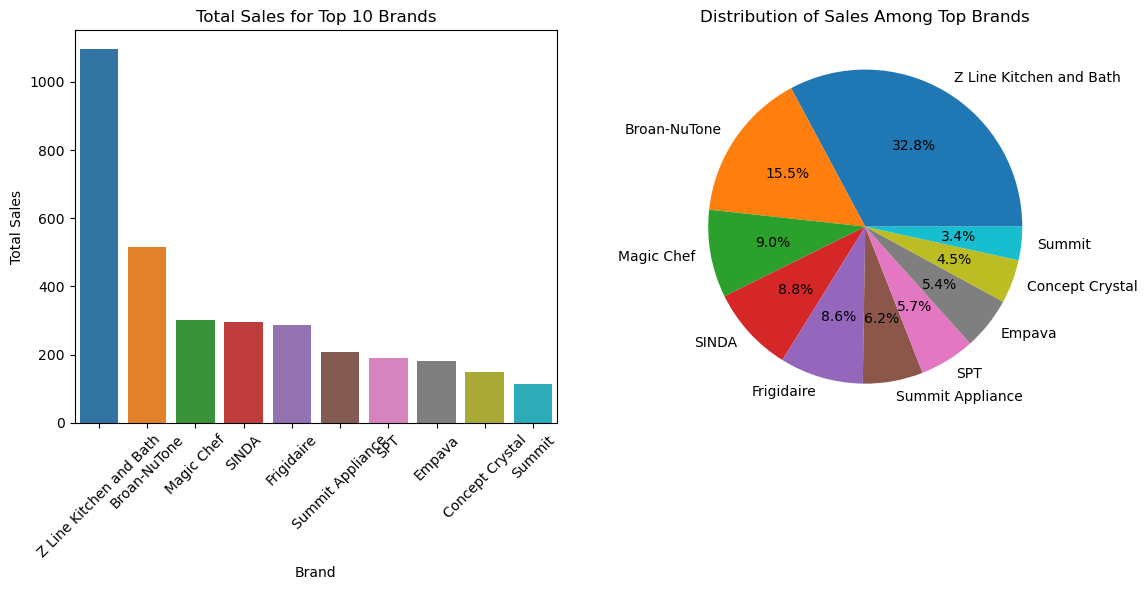

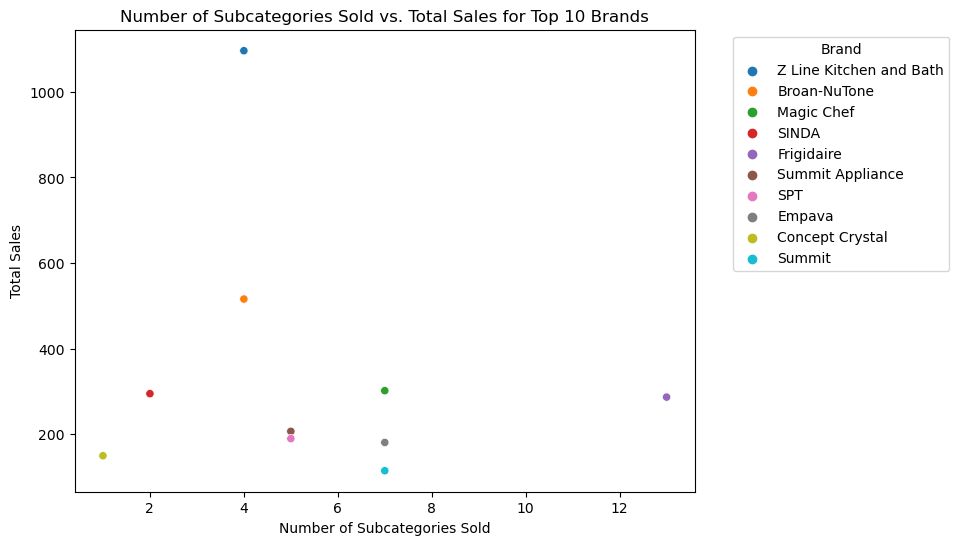

In [20]:
# How does brand affect sales
# Group the DataFrame by brandName and sum the 'numberOfSellers' column to get total sales
brand_sales = clean_df.groupby('brandName')['numberOfSellers'].sum().reset_index()

# Sort the brands by sales in descending order to get the top 10
top_10_brands = brand_sales.sort_values(by='numberOfSellers', ascending=False).head(10)

# Get the number of subcategories sold for each top brand
subcategories_count = clean_df.groupby('brandName')['subcategory.subcategoryName'].nunique().reset_index()

# Merge the two DataFrames to get the number of subcategories sold for each top brand
top_10_brands_with_subcategories = pd.merge(top_10_brands, subcategories_count, on='brandName')

# Rename the columns for clarity
top_10_brands_with_subcategories.columns = ['Brand', 'Total Sales', 'Number of Subcategories Sold']

# Print the table with the top 10 brands and the number of subcategories they sold
print("Top 10 Brands with Total Sales and Number of Subcategories Sold:")
print(top_10_brands_with_subcategories)

# Visualizations
plt.figure(figsize=(12, 6))

# Bar Plot - Total Sales for Each Brand
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_brands_with_subcategories, x='Brand', y='Total Sales')
plt.title("Total Sales for Top 10 Brands")
plt.xticks(rotation=45)

# Pie Chart - Distribution of Sales Among Top Brands
plt.subplot(1, 2, 2)
plt.pie(top_10_brands_with_subcategories['Total Sales'], labels=top_10_brands_with_subcategories['Brand'], autopct='%1.1f%%')
plt.title("Distribution of Sales Among Top Brands")

plt.tight_layout()
plt.show()

# Scatter Plot - Number of Subcategories Sold vs. Total Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_10_brands_with_subcategories, x='Number of Subcategories Sold', y='Total Sales', hue='Brand')
plt.title("Number of Subcategories Sold vs. Total Sales for Top 10 Brands")
plt.xlabel("Number of Subcategories Sold")
plt.ylabel("Total Sales")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
# We are going to see which category sells the best.
# Determining the total amount of sales for each category"
category_data = clean_df.groupby('subcategory.subcategoryName')['numberOfSellers'].sum().reset_index()

# Renaming the columns
category_data.columns = ['Category', 'Total Units Sold']

# Filtering out the categories so only the categories who have sold over 100 times appear
category_data = category_data.loc[(category_data["Total Units Sold"] > 100)].reset_index()
category_data

,index,Category,Total Units Sold
0,0,Accessories,113
1,10,Chest Freezers,257
2,17,Cooktops,841
3,20,Countertop Dishwashers,188
4,34,Freestanding Ranges,356
5,38,Glass Tiles,150
6,46,Ice Makers,1094
7,59,Portable Dryers,103
8,60,Portable Washers,529
9,61,Range Hoods,2868


In [22]:
# Adding the categories that have sold more than 100 times into a list
category_list = category_data["Category"].tolist()
category_list

['Accessories',
 'Chest Freezers',
 'Cooktops',
 'Countertop Dishwashers',
 'Freestanding Ranges',
 'Glass Tiles',
 'Ice Makers',
 'Portable Dryers',
 'Portable Washers',
 'Range Hoods',
 'Refrigerators',
 'Single Wall Ovens',
 'Stacked Washer & Dryer Units',
 'Upright Freezers',
 'Washers']

In [23]:
# We then reduce the dataframe to only include categories that have sold more than 100 times
reduced_df = clean_df[clean_df['subcategory.subcategoryName'].isin(category_list)]
reduced_df

,title,brandName,subcategory.subcategoryName,rank,productPageScore,manufacturer,totalRatings,numberOfSellers,monthlyRevenueEstimate,monthlyUnitsSold,reviewCount,reviewRating,buyBoxPrice,averageBuyBoxPrice
5,"AGLUCKY Countertop Ice Maker Machine, Portable...",AGLUCKY,Ice Makers,2.0,9.5,AGLUCKY,6706.0,1,254076.9,2310.0,21845,4.3,109.99,83.58
6,"AGLUCKY Countertop Ice Maker Machine, Portable...",AGLUCKY,Ice Makers,3.0,9.5,AGLUCKY,3415.0,1,254076.9,2310.0,21845,4.3,109.99,98.85
7,"AGLUCKY Counter top Ice Maker Machine,Compact ...",AGLUCKY,Ice Makers,3.0,9.5,AGLUCKY,5559.0,1,254076.9,2310.0,21845,4.3,109.99,95.66
9,Scotsman SCN60PA-1SS Brilliance Nugget Ice Mac...,Scotsman,Ice Makers,2275.0,4.3,Scotsman,0.0,1,217971.0,39.0,70,3.4,5589.00,5589.00
13,Verona Designer Series VDFSIE365SS 36 Inch 5 c...,Verona,Freestanding Ranges,5616.0,8.1,Verona,0.0,2,141225.0,25.0,7,5.0,5649.00,5649.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9851,FireFly Home Stove Top Protector for General E...,FireFly Home,Accessories,210289.0,5.2,FireFly Home,0.0,1,0.0,0.0,7,3.4,25.99,25.99
9853,"uxcell Refrigeration Tubing, 9/64"" OD x 7/64"" ...",uxcell,Refrigerators,52828.0,7.9,uxcell,1.0,2,0.0,0.0,159,4.4,14.49,14.49
9854,LG Diamond Collection 22.7 Cubic Feet Counter ...,LG,Refrigerators,20142.0,6.1,LG,0.0,1,0.0,0.0,13,2.9,4946.40,4946.40
9855,Setpower Insulated Protective Cover for AJ40 o...,Setpower,Refrigerators,2506.0,8.0,Setpower,0.0,1,0.0,0.0,50,4.7,69.99,69.99


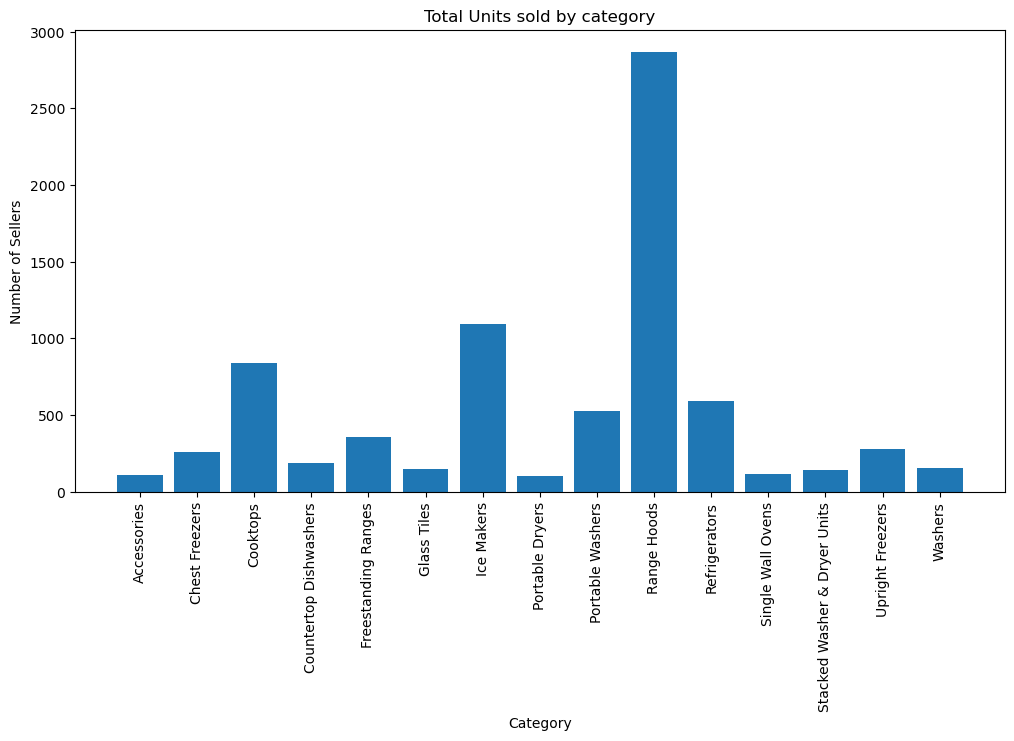

In [24]:
#Turning it into a bar graph
plt.figure(figsize=(12, 6))
plt.bar(category_data["Category"], category_data["Total Units Sold"])
plt.xlabel("Category")
plt.ylabel("Number of Sellers")
plt.title("Total Units sold by category")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Now that we see that range hoods seem to sell the best we are going to determine the factors that set range hood apart from others.
review_data = reduced_df.groupby('subcategory.subcategoryName')['reviewRating'].mean().reset_index()
# Renaming the columns
review_data.columns = ['Category', 'Review Rating']
review_data = review_data.sort_values(by="Review Rating", ascending=False)
review_data

,Category,Review Rating
5,Glass Tiles,4.500000
9,Range Hoods,4.363600
13,Upright Freezers,4.352555
1,Chest Freezers,4.350785
6,Ice Makers,4.181711
10,Refrigerators,4.125430
14,Washers,4.066292
2,Cooktops,4.057317
3,Countertop Dishwashers,3.997619
12,Stacked Washer & Dryer Units,3.944030


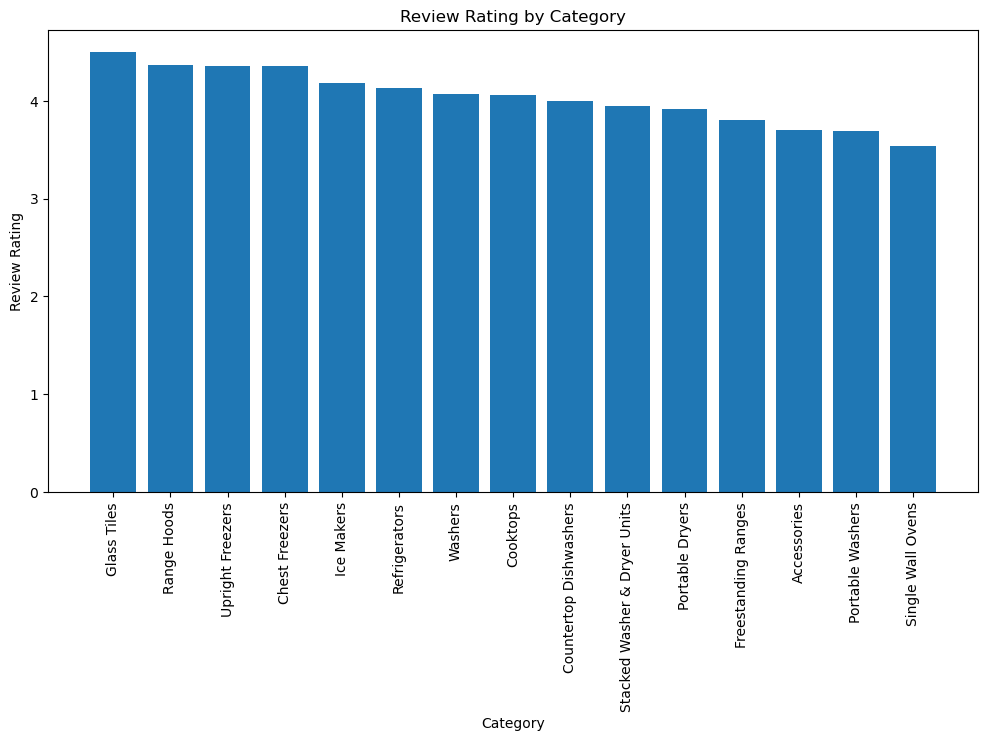

In [26]:
#Turning it into a bar graph
plt.figure(figsize=(12, 6))
plt.bar(review_data["Category"], review_data["Review Rating"])
plt.xlabel("Category")
plt.ylabel("Review Rating")
plt.title("Review Rating by Category")
plt.xticks(rotation=90)
plt.show()

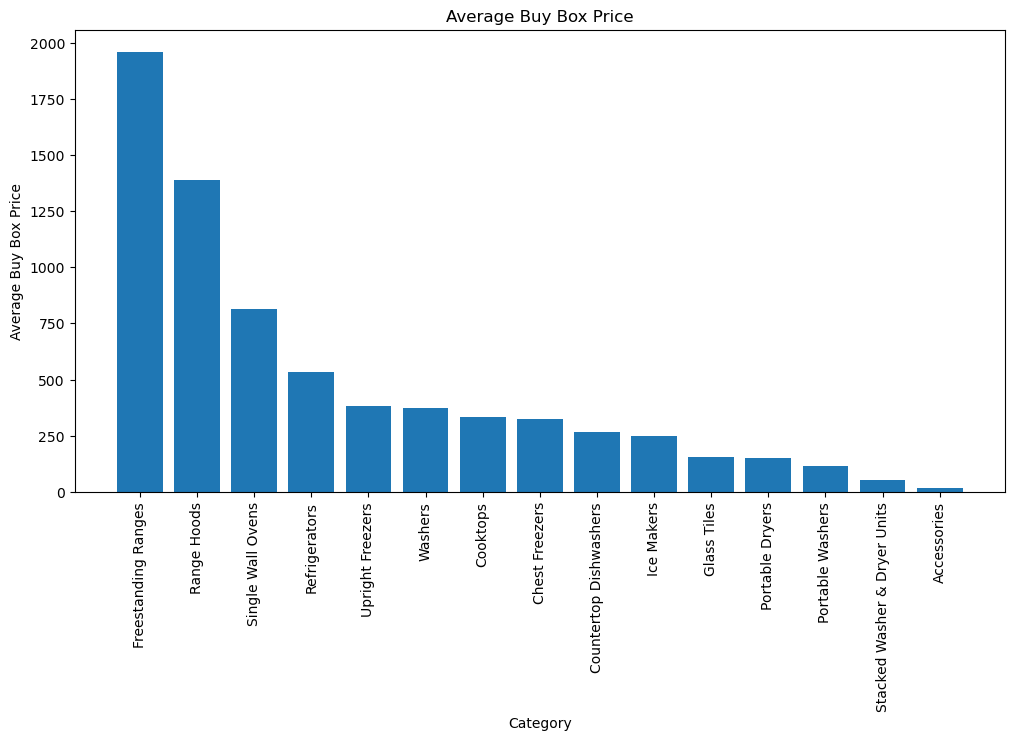

In [27]:
# Buy box price for each category

boxprice_data = reduced_df.groupby('subcategory.subcategoryName')['averageBuyBoxPrice'].mean().reset_index()
# Renaming the columns
boxprice_data.columns = ['Category', 'Average Buy Box Price']
boxprice_data = boxprice_data.sort_values(by="Average Buy Box Price", ascending=False)
boxprice_data

plt.figure(figsize=(12, 6))
plt.bar(boxprice_data["Category"], boxprice_data["Average Buy Box Price"])
plt.xlabel("Category")
plt.ylabel("Average Buy Box Price")
plt.title("Average Buy Box Price")
plt.xticks(rotation=90)
plt.show()

In [31]:
# Group the DataFrame by seller and aggregate data
seller_info = clean_df.groupby('numberOfSellers').agg(
    NumberofCompanies=('brandName', 'nunique'),
    NumberofSubcategories=('subcategory.subcategoryName', 'nunique'),
    TotalUnitsSold=('numberOfSellers', 'sum')
).reset_index()

# Rename the columns for better readability
seller_info.columns = ['Seller', 'Number of Companies', 'Number of Subcategories', 'Total Units Sold']

# Sort the table by the number of subcategories in descending order
seller_info = seller_info.sort_values(by='Number of Subcategories', ascending=False)

# Display the table with number of units sold, number of companies, and number of subcategories for each seller
print("Table with Seller Information:")
print(seller_info)

Table with Seller Information:
    Seller  Number of Companies  Number of Subcategories  Total Units Sold
1        1                  626                       73              3451
2        2                  175                       36               916
0        0                  131                       26                 0
3        3                   70                       23               405
4        4                   39                       16               340
5        5                   30                       13               220
6        6                   21                       12               402
7        7                   24                       12               483
8        8                   17                       10               392
9        9                   11                        9               288
12      12                    8                        8               192
10      10                   10                        7             

In [32]:
# Group the DataFrame by subcategory and brandName, and aggregate data
subcategory_info = clean_df.groupby(['subcategory.subcategoryName', 'brandName']).agg(
    TotalSellers=('numberOfSellers', 'count'),
    TotalUnitsSold=('numberOfSellers', 'sum')
).reset_index()

# Group the DataFrame by subcategory to get the number of companies, total sellers, and total units sold for each subcategory
subcategory_summary = subcategory_info.groupby('subcategory.subcategoryName').agg(
    NumberofCompanies=('brandName', 'nunique'),
    TotalSellers=('TotalSellers', 'sum'),
    TotalUnitsSold=('TotalUnitsSold', 'sum')
).reset_index()

# Rename the columns for better readability
subcategory_summary.columns = ['Subcategory', 'Number of Companies', 'Total Sellers', 'Total Units Sold']

# Sort the table by the number of companies in descending order
subcategory_summary = subcategory_summary.sort_values(by='Number of Companies', ascending=False)

# Display the table with number of companies, total sellers, and total units sold for each subcategory
print("Table with Subcategory Summary:")

subcategory_summary

Table with Subcategory Summary:


,Subcategory,Number of Companies,Total Sellers,Total Units Sold
60,Portable Washers,194,477,529
46,Ice Makers,144,596,1094
63,Refrigerators,105,291,592
17,Cooktops,91,492,841
61,Range Hoods,89,1250,2868
...,...,...,...,...
51,Lint Screens,1,2,2
53,Motors,1,1,1
54,One-Piece Toilets,1,2,2
55,Outdoor Ice Machines,1,2,2


In [33]:
# Group the DataFrame by brandName and subcategory, and aggregate data
brand_info = clean_df.groupby(['brandName', 'subcategory.subcategoryName']).agg(
    NumberofSellers=('numberOfSellers', 'sum'),
    TotalUnitsSold=('numberOfSellers', 'sum')
).reset_index()

# Group the DataFrame by brandName to get the number of subcategories, total sellers, and total units sold for each company
brand_summary = brand_info.groupby('brandName').agg(
    NumberofSubcategories=('subcategory.subcategoryName', 'nunique'),
    NumberofSellers=('NumberofSellers', 'sum'),
    TotalUnitsSold=('TotalUnitsSold', 'sum')
).reset_index()

# Rename the columns for better readability
brand_summary.columns = ['Company', 'Number of Subcategories', 'Total Sellers', 'Total Units Sold']

# Sort the table by the number of subcategories in descending order
brand_summary = brand_summary.sort_values(by='Number of Subcategories', ascending=False)

# Display the table with number of subcategories, total sellers, and total units sold for each company
print("Table with Brand Summary:")
brand_summary

Table with Brand Summary:


,Company,Number of Subcategories,Total Sellers,Total Units Sold
221,Frigidaire,13,287,287
229,GE,13,76,76
141,Danby,9,103,103
99,COSMO,9,88,88
538,RCA,8,42,42
...,...,...,...,...
282,Hauslane,1,42,42
283,Headerbs,1,3,3
284,Helohome,1,0,0
285,Hengme,1,2,2


In [ ]:
# Data for each brand of range hoods

In [34]:
# Top 10 Brands for Range Hoods by Monthly Revenue
brand_range_hoods = clean_df[["brandName", "subcategory.subcategoryName", "manufacturer", "monthlyRevenueEstimate", "monthlyUnitsSold", "reviewCount", "reviewRating", "averageBuyBoxPrice"]]
brand_range_hoods = brand_range_hoods.loc[(brand_range_hoods["subcategory.subcategoryName"] == "Range Hoods")]
brand_range_hoods_revenue = brand_range_hoods.groupby("brandName")["monthlyRevenueEstimate"].sum().sort_values(ascending = False)

In [35]:
brand_range_hoods_review = brand_range_hoods.groupby("brandName")["reviewRating"].mean().sort_values(ascending = False)
brand_range_hoods_review

brandName
Futuro Futuro              5.000000
SINDA                      4.960069
Generic                    4.800000
NT Air                     4.800000
THE FRYOILSAVER COMPANY    4.800000
                             ...   
BQLZR                      3.500000
RDEXP                      3.400000
Happy nest                 3.000000
Copper Tailor              2.900000
COMOK                      2.500000
Name: reviewRating, Length: 89, dtype: float64

In [36]:
brand_range_hoods_reviewcount = brand_range_hoods.groupby("brandName")["reviewCount"].sum().sort_values(ascending = False)
brand_range_hoods_reviewcount

brandName
COSMO                      34030
Z Line Kitchen and Bath    23801
Broan-NuTone               20020
Hauslane                   15330
CIARRA                     14901
                           ...  
Faber                          7
Generic                        7
NXR                            5
NT Air                         5
BQLZR                          5
Name: reviewCount, Length: 89, dtype: int64

In [37]:
brand_range_hoods_monthlysold = brand_range_hoods.groupby("brandName")["monthlyUnitsSold"].sum().sort_values(ascending = False)
brand_range_hoods_monthlysold

brandName
Broan-NuTone          1492.0
IKTCH                 1271.0
COSMO                  996.0
CIARRA                 845.0
FIREGAS                708.0
                       ...  
Iamsii                   6.0
XO                       5.0
Faber                    4.0
Sakura Range Hoods       4.0
Agua Canada              0.0
Name: monthlyUnitsSold, Length: 89, dtype: float64

In [38]:
brand_range_hoods_boxprice = brand_range_hoods.groupby("brandName")["averageBuyBoxPrice"].mean().sort_values(ascending = False)
brand_range_hoods_boxprice

brandName
SINDA            4228.774271
SUN AIR          2695.156000
HOODMART         2435.941176
Futuro Futuro    1561.666667
FOTILE           1443.672857
                    ...     
RDEXP               8.980000
COMOK               8.790000
Happy nest          5.990000
LDEXIN              5.883333
Koozzo             -1.000000
Name: averageBuyBoxPrice, Length: 89, dtype: float64

In [134]:
# Turning it into a data frame
brand_range_hoods_data = pd.DataFrame({"Monthly Revenue Estimate":brand_range_hoods_revenue, "Average Review Rating": brand_range_hoods_review, "Total Review Count": brand_range_hoods_reviewcount,
                                      "Monthly Units Sold": brand_range_hoods_monthlysold, "Average Buy Box Price":brand_range_hoods_boxprice})
brand_range_hoods_data = brand_range_hoods_data.sort_values(by = "Monthly Revenue Estimate", ascending=False)
brand_range_hoods_data

,Monthly Revenue Estimate,Average Review Rating,Total Review Count,Monthly Units Sold,Average Buy Box Price
brandName,,,,,
IKTCH,504220.61,4.363158,13019,1271.0,357.250263
Z Line Kitchen and Bath,463408.42,4.056863,23801,570.0,962.882222
Broan-NuTone,426989.70,4.232323,20020,1492.0,337.396970
FOTILE,339799.44,4.378571,3063,236.0,1443.672857
COSMO,275145.97,4.373913,34030,996.0,299.235652
...,...,...,...,...,...
Generic,237.83,4.800000,7,17.0,13.990000
LDEXIN,213.12,4.000000,21,24.0,5.883333
Happy nest,173.71,3.000000,12,29.0,5.990000


In [151]:
#Comparing the top 10 brands (sorted by revenue)
top10brands = brand_range_hoods_data.head(10)
top10brands

,Monthly Revenue Estimate,Average Review Rating,Total Review Count,Monthly Units Sold,Average Buy Box Price
brandName,,,,,
IKTCH,504220.61,4.363158,13019,1271.0,357.250263
Z Line Kitchen and Bath,463408.42,4.056863,23801,570.0,962.882222
Broan-NuTone,426989.70,4.232323,20020,1492.0,337.396970
FOTILE,339799.44,4.378571,3063,236.0,1443.672857
COSMO,275145.97,4.373913,34030,996.0,299.235652
Hauslane,251010.79,4.110714,15330,621.0,335.299286
Kobe,195794.80,4.058621,2764,359.0,604.319655
CIARRA,168366.98,4.481081,14901,845.0,229.904324
AKDY,154059.11,4.027273,2294,454.0,357.790909


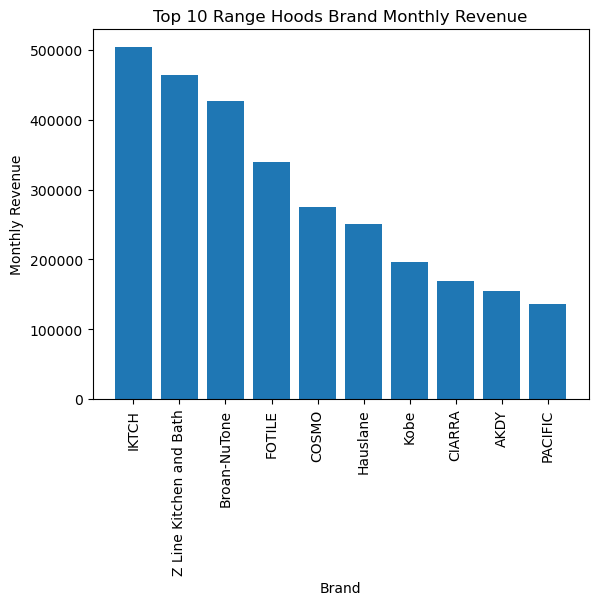

In [152]:
# Comparing the top 10 brands revenue
plt.bar(top10brands.index, top10brands["Monthly Revenue Estimate"])
plt.title("Top 10 Range Hoods Brand Monthly Revenue")
plt.xlabel("Brand")
plt.ylabel("Monthly Revenue")
plt.xticks(rotation=90)
plt.show()

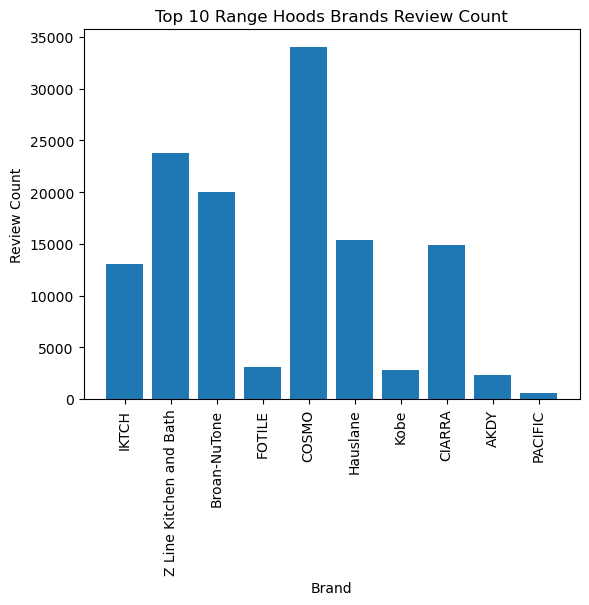

In [140]:
# Top 10 brands review count comparison
plt.bar(top10brands.index, top10brands["Total Review Count"])
plt.title("Top 10 Range Hoods Brands Review Count")
plt.xlabel("Brand")
plt.ylabel("Review Count")
plt.xticks(rotation=90)
plt.show()

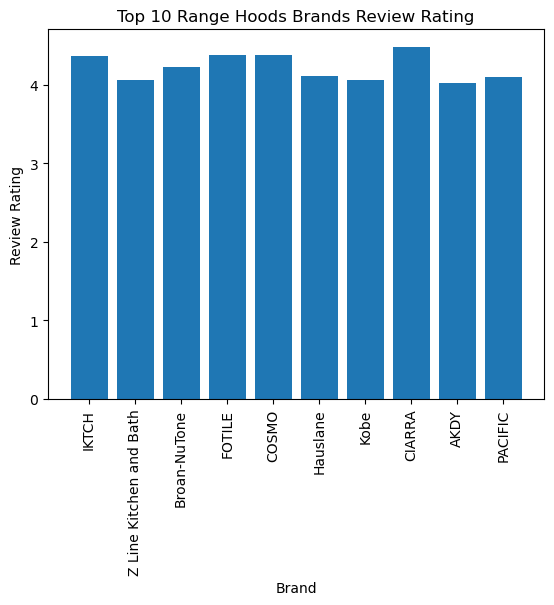

In [141]:
# Top 10 brands review rating comparison
plt.bar(top10brands.index, top10brands["Average Review Rating"])
plt.title("Top 10 Range Hoods Brands Review Rating")
plt.xlabel("Brand")
plt.ylabel("Review Rating")
plt.xticks(rotation=90)
plt.show()

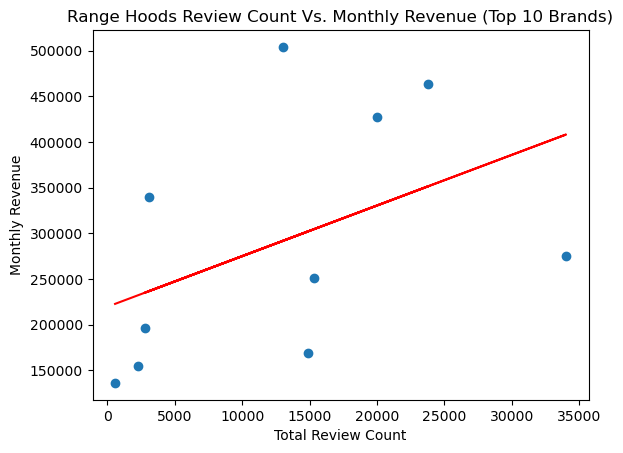

The r-value is 0.45099805938081783
The median review count is: 13960.0
The average review count is: 12978.5


In [143]:
# Plotting top 10 brands review count vs monthly revenue
plt.scatter(top10brands["Total Review Count"], top10brands["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(top10brands["Total Review Count"], top10brands["Monthly Revenue Estimate"])
regress_values = top10brands["Total Review Count"] * slope + intercept
plt.plot(top10brands["Total Review Count"], regress_values, "r-")
plt.title("Range Hoods Review Count Vs. Monthly Revenue (Top 10 Brands)")
plt.xlabel("Total Review Count")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
top10medianreviewcount = top10brands["Total Review Count"].median()
top10averagereviewcount = top10brands["Total Review Count"].mean()
print("The median review count is:", top10medianreviewcount)
print("The average review count is:", top10averagereviewcount)

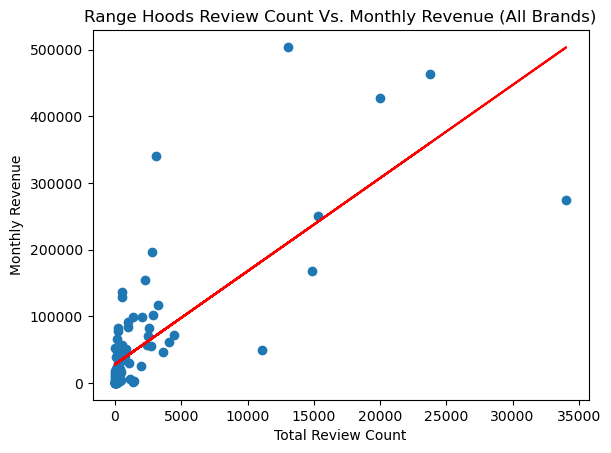

The r-value is 0.7660620306950564
The median review count is: 235.0
The average review count is: 2150.6629213483147


In [144]:
# Plotting review count vs monthly revenue for all brands
plt.scatter(brand_range_hoods_data["Total Review Count"], brand_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(brand_range_hoods_data["Total Review Count"], brand_range_hoods_data["Monthly Revenue Estimate"])
regress_values = brand_range_hoods_data["Total Review Count"] * slope + intercept
plt.plot(brand_range_hoods_data["Total Review Count"], regress_values, "r-")
plt.title("Range Hoods Review Count Vs. Monthly Revenue (All Brands)")
plt.xlabel("Total Review Count")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
medianreviewcount = brand_range_hoods_data["Total Review Count"].median()
averagereviewcount = brand_range_hoods_data["Total Review Count"].mean()
print("The median review count is:", medianreviewcount)
print("The average review count is:", averagereviewcount)

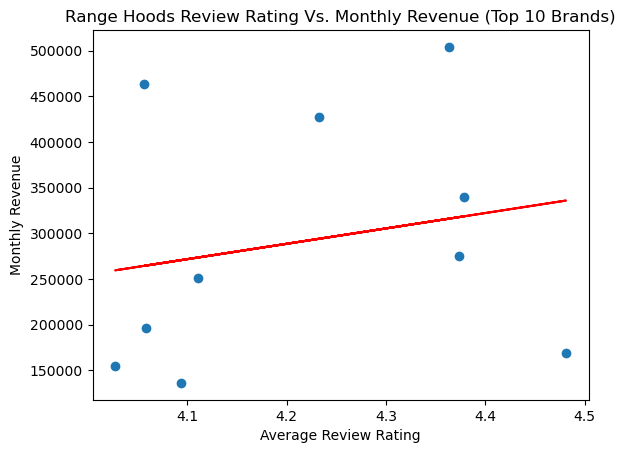

The r-value is 0.20970460853351605
The median review rating is: 4.17151875901876
The average review rating is: 4.21766347749899


In [150]:
# Plotting top 10 brands review rating vs monthly revenue
plt.scatter(top10brands["Average Review Rating"], top10brands["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(top10brands["Average Review Rating"], top10brands["Monthly Revenue Estimate"])
regress_values = top10brands["Average Review Rating"] * slope + intercept
plt.plot(top10brands["Average Review Rating"], regress_values, "r-")
plt.title("Range Hoods Review Rating Vs. Monthly Revenue (Top 10 Brands)")
plt.xlabel("Average Review Rating")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
top10medianreviewrating = top10brands["Average Review Rating"].median()
top10averagereviewrating = top10brands["Average Review Rating"].mean()
print("The median review rating is:", top10medianreviewrating)
print("The average review rating is:", top10averagereviewrating)

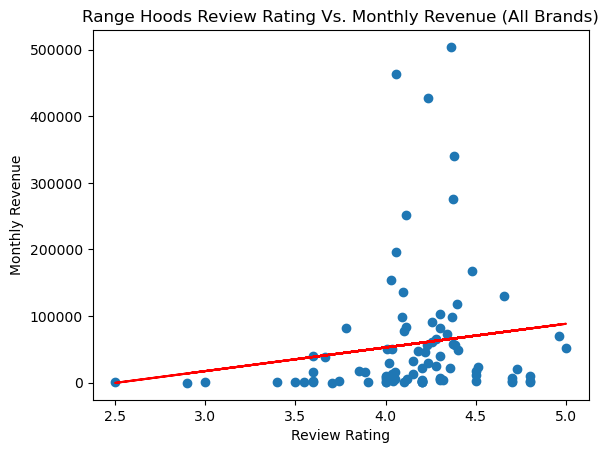

The r-value is 0.14744445783644078
The median review rating is: 4.2
The median review rating is: 4.145343304071931


In [153]:
# Plotting range hood review rating vs monthly revenue
plt.scatter(brand_range_hoods_data["Average Review Rating"], brand_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(brand_range_hoods_data["Average Review Rating"], brand_range_hoods_data["Monthly Revenue Estimate"])
regress_values = brand_range_hoods_data["Average Review Rating"] * slope + intercept
plt.plot(brand_range_hoods_data["Average Review Rating"], regress_values, "r-")
plt.title("Range Hoods Review Rating Vs. Monthly Revenue (All Brands)")
plt.xlabel("Review Rating")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
medianreviewrating = brand_range_hoods_data["Average Review Rating"].median()
averagereviewrating = brand_range_hoods_data["Average Review Rating"].mean()
print("The median review rating is:", medianreviewrating)
print("The median review rating is:", averagereviewrating)

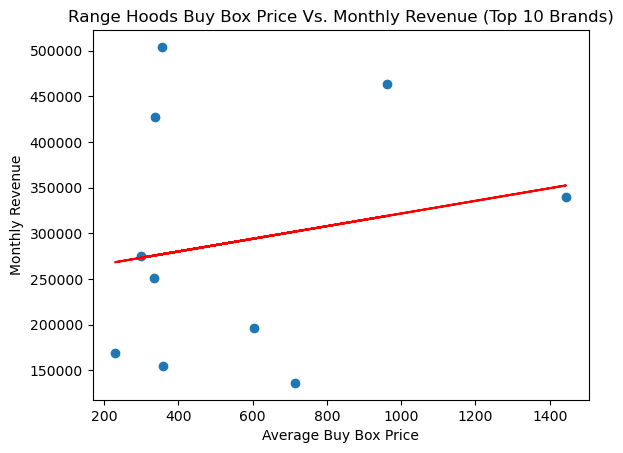

The r-value is 0.19679585110665593
The median box price is: 357.5205861244019
The average box price is: 564.3046256342848


In [149]:
# Plotting top 10 brands buy box price vs monthly revenue
plt.scatter(top10brands["Average Buy Box Price"], top10brands["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(top10brands["Average Buy Box Price"], top10brands["Monthly Revenue Estimate"])
regress_values = top10brands["Average Buy Box Price"] * slope + intercept
plt.plot(top10brands["Average Buy Box Price"], regress_values, "r-")
plt.title("Range Hoods Buy Box Price Vs. Monthly Revenue (Top 10 Brands)")
plt.xlabel("Average Buy Box Price")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
top10boxpricemedian = top10brands["Average Buy Box Price"].median()
top10boxpriceaverage = top10brands["Average Buy Box Price"].mean()
print("The median box price is:", top10boxpricemedian)
print("The average box price is:", top10boxpriceaverage)

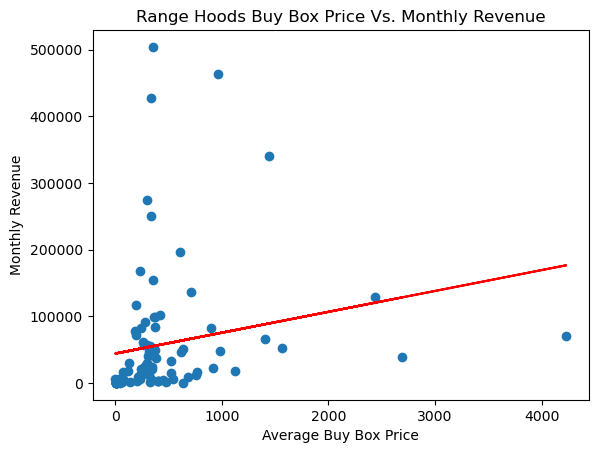

The r-value is 0.19529743963576113
The median box price is: 310.219
The Average Box price is: 444.5124740704778


In [114]:
# Buy box price compared with monthly revenue
plt.scatter(brand_range_hoods_data["Average Buy Box Price"], brand_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(brand_range_hoods_data["Average Buy Box Price"], brand_range_hoods_data["Monthly Revenue Estimate"])
regress_values = brand_range_hoods_data["Average Buy Box Price"] * slope + intercept
plt.plot(brand_range_hoods_data["Average Buy Box Price"], regress_values, "r-")
plt.title("Range Hoods Buy Box Price Vs. Monthly Revenue")
plt.xlabel("Average Buy Box Price")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)
boxpricemedian = brand_range_hoods_data["Average Buy Box Price"].median()
boxpriceaverage = brand_range_hoods_data["Average Buy Box Price"].mean()
print("The median box price is:", boxpricemedian)
print("The Average Box price is:", boxpriceaverage)

In [45]:
# Data for manufacturers

In [46]:
manufacturer_range_hoods_revenue = brand_range_hoods.groupby("manufacturer")["monthlyRevenueEstimate"].sum().sort_values(ascending = False)
manufacturer_range_hoods_revenue

manufacturer
Z Line Kitchen and Bath LLC    521472.41
IKTCH                          504220.61
FOTILE                         339799.44
Broan-NuTone                   276188.49
Cosmo                          244337.94
                                 ...    
Generic                           237.83
LDEXIN                            213.12
Happy nest                        173.71
Copper Tailor                      99.90
Agua Canada                         0.00
Name: monthlyRevenueEstimate, Length: 108, dtype: float64

In [47]:
manufacturer_range_hoods_reviewrating = brand_range_hoods.groupby("manufacturer")["reviewRating"].mean().sort_values(ascending = False)
manufacturer_range_hoods_reviewrating

manufacturer
Futuro Futuro       5.000000
SINDA               4.960069
CHG                 4.800000
Generic             4.800000
NT AIR Italy        4.800000
                      ...   
Broan-Nutone Llc    3.000000
Happy nest          3.000000
Copper Tailor       2.900000
Lambro              2.800000
COMOK               2.500000
Name: reviewRating, Length: 108, dtype: float64

In [48]:
manufacturer_range_hoods_reviewcount = brand_range_hoods.groupby("manufacturer")["reviewCount"].sum().sort_values(ascending = False)
manufacturer_range_hoods_reviewcount

manufacturer
Cosmo                          32495
Z Line Kitchen and Bath LLC    24030
CIARRA                         14901
Broan-NuTone                   13060
IKTCH                          13019
                               ...  
Generic                            7
Broan-Nutone Llc                   6
BQLZR                              5
Duro Corporation                   5
NT AIR Italy                       5
Name: reviewCount, Length: 108, dtype: int64

In [49]:
manufacturer_range_hoods_monthlysold = brand_range_hoods.groupby("manufacturer")["monthlyUnitsSold"].sum().sort_values(ascending = False)
manufacturer_range_hoods_monthlysold

manufacturer
IKTCH                                   1271.0
Cosmo                                    875.0
Broan-NuTone                             860.0
CIARRA                                   845.0
Broan                                    835.0
                                         ...  
Pacific Specialty Brands - Drop Ship       4.0
Broan-Nutone Llc                           4.0
PROLINE                                    2.0
Pacifc Hood                                1.0
Agua Canada                                0.0
Name: monthlyUnitsSold, Length: 108, dtype: float64

In [50]:
manufacturer_range_hoods_boxprice = brand_range_hoods.groupby("manufacturer")["averageBuyBoxPrice"].mean().sort_values(ascending = False)
manufacturer_range_hoods_boxprice

manufacturer
SINDA            4228.774271
SUN AIR          2695.156000
Nak's, Inc.      2506.000000
Naks, Inc.       2426.600000
Futuro Futuro    1561.666667
                    ...     
RDEXPAM             8.980000
COMOK               8.790000
Happy nest          5.990000
LDEXIN              5.883333
Koozzo             -1.000000
Name: averageBuyBoxPrice, Length: 108, dtype: float64

In [51]:
# Putting it all into a dataframe
manufacturer_range_hoods_data = pd.DataFrame({"Monthly Revenue Estimate":manufacturer_range_hoods_revenue, "Average Review Rating": manufacturer_range_hoods_reviewrating, "Total Review Count": manufacturer_range_hoods_reviewcount,
                                      "Monthly Units Sold": manufacturer_range_hoods_monthlysold, "Average Buy Box Price":manufacturer_range_hoods_boxprice})
manufacturer_range_hoods_data.sort_values(by = "Monthly Revenue Estimate", ascending=False)

,Monthly Revenue Estimate,Average Review Rating,Total Review Count,Monthly Units Sold,Average Buy Box Price
manufacturer,,,,,
Z Line Kitchen and Bath LLC,521472.41,4.024405,24030,691.0,960.466012
IKTCH,504220.61,4.363158,13019,1271.0,357.250263
FOTILE,339799.44,4.378571,3063,236.0,1443.672857
Broan-NuTone,276188.49,4.360345,13060,860.0,357.202414
Cosmo,244337.94,4.361905,32495,875.0,303.830000
...,...,...,...,...,...
Generic,237.83,4.800000,7,17.0,13.990000
LDEXIN,213.12,4.000000,21,24.0,5.883333
Happy nest,173.71,3.000000,12,29.0,5.990000


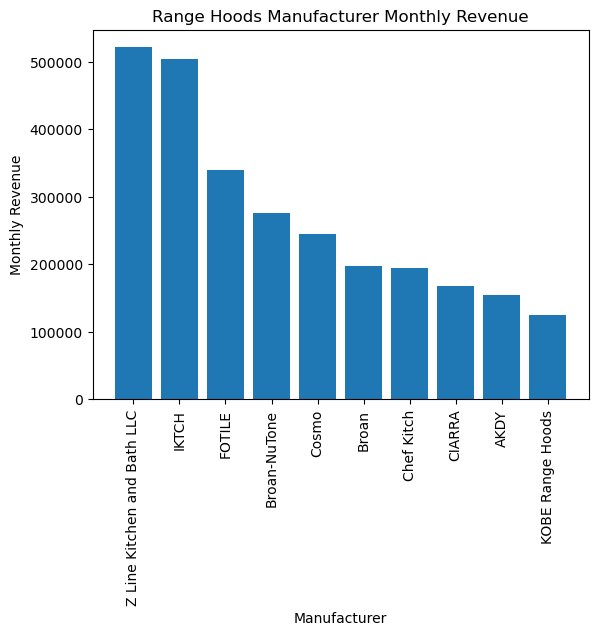

In [52]:
# Comparison of each brand's monthly revenue
manufacturer_range_hoods_top10revenue = manufacturer_range_hoods_revenue.head(10)
manufacturer_range_hoods_top10revenue
plt.bar(manufacturer_range_hoods_top10revenue.index, manufacturer_range_hoods_top10revenue.values)
plt.title("Range Hoods Manufacturer Monthly Revenue")
plt.xlabel("Manufacturer")
plt.ylabel("Monthly Revenue")
plt.xticks(rotation=90)
plt.show()

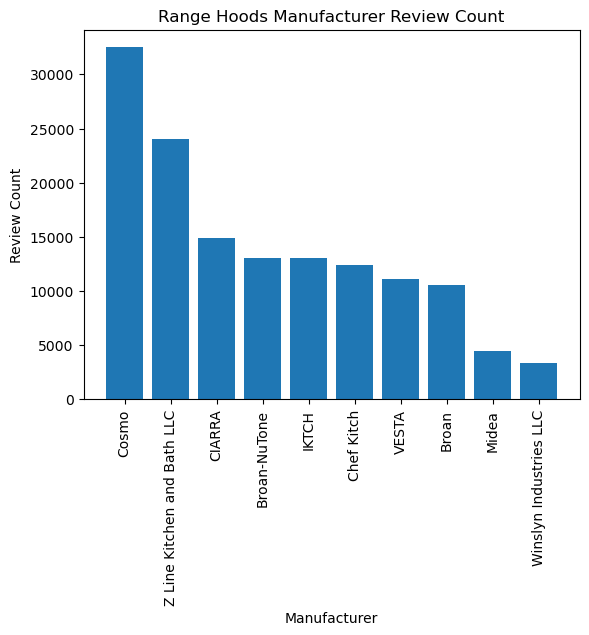

In [53]:
# Comparison of each manufacturers review count
manufacturer_range_hoods_top10reviewcount = manufacturer_range_hoods_reviewcount.head(10)
manufacturer_range_hoods_top10reviewcount
plt.bar(manufacturer_range_hoods_top10reviewcount.index, manufacturer_range_hoods_top10reviewcount.values)
plt.title("Range Hoods Manufacturer Review Count")
plt.xlabel("Manufacturer")
plt.ylabel("Review Count")
plt.xticks(rotation=90)
plt.show()

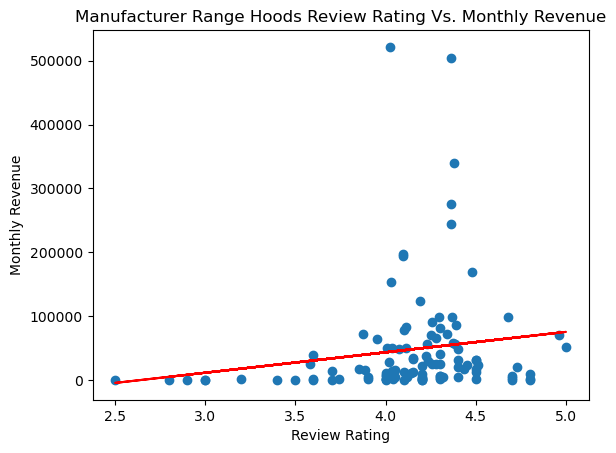

The r-value is 0.1557805050405833


In [110]:
# Plotting range hood review rating vs monthly revenue
plt.scatter(manufacturer_range_hoods_data["Average Review Rating"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(manufacturer_range_hoods_data["Average Review Rating"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
regress_values = manufacturer_range_hoods_data["Average Review Rating"] * slope + intercept
plt.plot(manufacturer_range_hoods_data["Average Review Rating"], regress_values, "r-")
plt.title("Manufacturer Range Hoods Review Rating Vs. Monthly Revenue")
plt.xlabel("Review Rating")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)

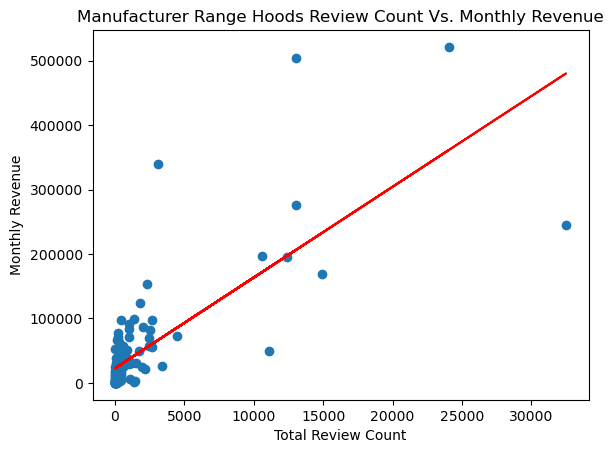

The r-value is 0.758667198896745


In [111]:
# Plotting review count vs monthly revenue
plt.scatter(manufacturer_range_hoods_data["Total Review Count"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(manufacturer_range_hoods_data["Total Review Count"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
regress_values = manufacturer_range_hoods_data["Total Review Count"] * slope + intercept
plt.plot(manufacturer_range_hoods_data["Total Review Count"], regress_values, "r-")
plt.title("Manufacturer Range Hoods Review Count Vs. Monthly Revenue")
plt.xlabel("Total Review Count")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)

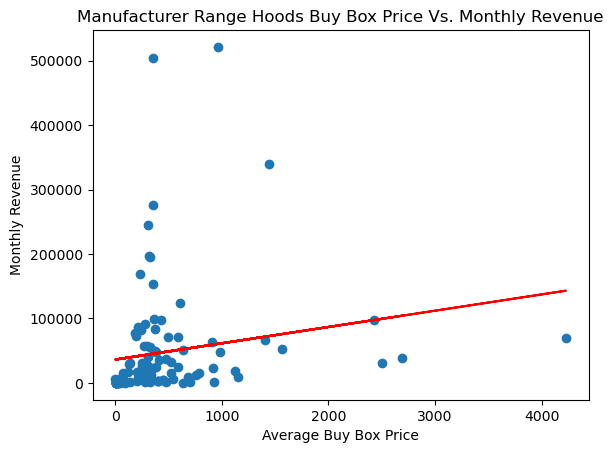

The r-value is 0.1755169712138803


In [123]:
# Manufacturer Buy box price compared with monthly revenue
plt.scatter(manufacturer_range_hoods_data["Average Buy Box Price"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(manufacturer_range_hoods_data["Average Buy Box Price"], manufacturer_range_hoods_data["Monthly Revenue Estimate"])
regress_values = manufacturer_range_hoods_data["Average Buy Box Price"] * slope + intercept
plt.plot(manufacturer_range_hoods_data["Average Buy Box Price"], regress_values, "r-")
plt.title("Manufacturer Range Hoods Buy Box Price Vs. Monthly Revenue")
plt.xlabel("Average Buy Box Price")
plt.ylabel("Monthly Revenue")
plt.show()
print("The r-value is", rvalue)